### Mini Project 1-Stock Market Analysis Using Python

#### Business Scenario: 

Data Science extracts meaningful insight from chunks of raw data, which is useful to different business segments for planning their future course of action. Finance is probably one of the first to catch on to this trend with a rise in the penetration of analytics into many aspects of our lives. Here, we will analyze data from the stock market for some technology stocks such as Apple, Google, Amazon, and Microsoft.

#### Objective: 

Use Python libraries such as Pandas, Seaborn, and Matplotlib to extract and analyze the information, visualize it, and look at different ways to analyze the risk of a stock, based on its performance history.

#### About the Data: 


The stocks we have chosen are from various industries and market caps namely,
•Apple
•Google
•Microsoft
•Amazon

For the start, we shall investigate the Amazon stock individually and then move on to the combined analysis.

To know more about stocks and their data please visit the below link:https://in.finance.yahoo.com/The 

following tasks are to be performed:•Read the Data from Yahoo finance website directly.•Perform cleaning.•What was the change in stock price over time?•Visualize the change in a stock’s volume being traded, over time?•What was the moving average of various stocks?•What was the daily return average of a stock?•Adda new column ‘Trend’ whose values are based on the 'Daily Return'.•Visualize trend frequency through a Pie Chart.•What was the correlation between the daily returns of different stocks?

In [1]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
tickers = ['AAPL', 'MSFT', '^GSPC', 'AMZN']

In [3]:
start_date = '2017-01-01'
end_date = '2022-01-01'

In [4]:
#Read the Data from Yahoo finance website directly

df = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [5]:
#cleaning

data = df['Close']

In [6]:
data.head()

Symbols,AAPL,MSFT,^GSPC,AMZN
Date,,,,
2017-01-03,29.037500,62.580002,2257.830078,37.683498
2017-01-04,29.004999,62.299999,2270.750000,37.859001
2017-01-05,29.152500,62.299999,2269.000000,39.022499
2017-01-06,29.477501,62.840000,2276.979980,39.799500
2017-01-09,29.747499,62.639999,2268.899902,39.846001


In [7]:
data.isnull().sum()

Symbols
AAPL     0
MSFT     0
^GSPC    0
AMZN     0
dtype: int64

In [8]:
#get all weekdays between my start date and end date

weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

In [9]:
weekdays

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=1305, freq='B')

In [10]:
data = data.reindex(weekdays)

In [11]:
data.head()

Symbols,AAPL,MSFT,^GSPC,AMZN
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,29.037500,62.580002,2257.830078,37.683498
2017-01-04,29.004999,62.299999,2270.750000,37.859001
2017-01-05,29.152500,62.299999,2269.000000,39.022499
2017-01-06,29.477501,62.840000,2276.979980,39.799500


In [12]:
data = data.fillna(method = 'ffill')

In [13]:
data.head()

Symbols,AAPL,MSFT,^GSPC,AMZN
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,29.037500,62.580002,2257.830078,37.683498
2017-01-04,29.004999,62.299999,2270.750000,37.859001
2017-01-05,29.152500,62.299999,2269.000000,39.022499
2017-01-06,29.477501,62.840000,2276.979980,39.799500


In [14]:
data.describe()

Symbols,AAPL,MSFT,^GSPC,AMZN
count,1304.000000,1304.000000,1304.000000,1304.000000
mean,74.697477,154.520614,3120.535506,104.240146
std,40.693655,75.741398,663.636970,43.891294
min,29.004999,62.299999,2237.399902,37.683498
25%,42.996250,94.024998,2658.130066,74.963125
50%,53.868752,135.349998,2888.640015,91.439499
75%,115.849998,212.649994,3421.309937,155.863998
max,180.330002,343.109985,4793.060059,186.570496


In [15]:
#what was the chnge in stock price over time?

#todas:100
#tomarrow = 102
#retun/pn1?
#absolute return = 102-100
#% return = (102-100)/100*100

In [16]:
#daily return
x = []
for idx,i in enumerate(data['AAPL']):
    if idx == 0:
        pass
    else:
         x.append((data['AAPL'][idx] - data['AAPL'][idx-1])/data['AAPL'][idx-1])

In [17]:
x

[nan,
 -0.0011192843831649383,
 0.005085364457476186,
 0.011148298130121184,
 0.00915947899344536,
 0.0010085112088111911,
 0.005373179299545875,
 -0.0041753653444676405,
 -0.0017609986119300316,
 0.0,
 0.008064508376086847,
 -8.335113525390626e-05,
 -0.0017501382466151754,
 0.001836710827727531,
 0.0006666819254557292,
 -0.0009160610315973073,
 0.015920613597403526,
 0.00049233007335499,
 8.19624949633734e-05,
 -0.0026240238034612867,
 -0.002302053651398949,
 0.0609806478692047,
 -0.0017087473452669904,
 0.004279180401318147,
 0.009373965276680213,
 0.009517273444330128,
 0.0038774006809784278,
 0.0028779529092297306,
 -0.002265541881182175,
 0.008855572299314348,
 0.01297930132395101,
 0.0036290195442908882,
 -0.0011806391395893809,
 0.002733617292226259,
 0.0,
 0.0072207170551481775,
 0.002999295327450607,
 -0.004230193483136039,
 0.0009522074560526084,
 0.0019756256873768303,
 0.0004382737208268831,
 0.020439358206380043,
 -0.0059373818737278655,
 0.005900921314131301,
 -0.00314782

In [18]:
return_apple = data['AAPL'].pct_change()*100

<AxesSubplot:>

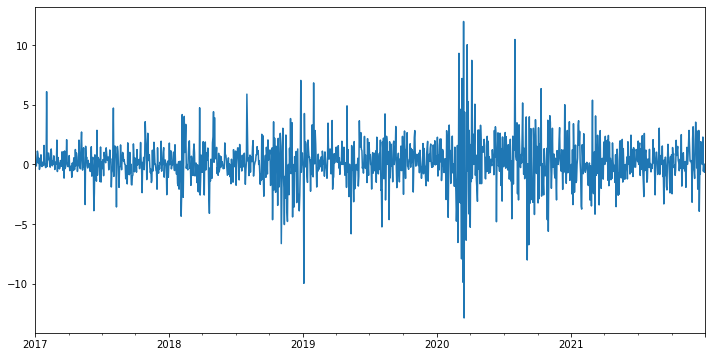

In [19]:
return_apple.plot(figsize=(12,6))

In [21]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
#Visualize the change in a stock’s volume being traded, over time?
df = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [23]:
df.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL       MSFT        ^GSPC       AMZN       AAPL   
Date                                                                  
2017-01-03  27.174753  57.645367  2257.830078  37.683498  29.037500   
2017-01-04  27.144335  57.387447  2270.750000  37.859001  29.004999   
2017-01-05  27.282381  57.387447  2269.000000  39.022499  29.152500   
2017-01-06  27.586527  57.884869  2276.979980  39.799500  29.477501   
2017-01-09  27.839209  57.700653  2268.899902  39.846001  29.747499   

Attributes                                          High             ...  \
Symbols          MSFT        ^GSPC       AMZN       AAPL       MSFT  ...   
Date                                                                 ...   
2017-01-03  62.580002  2257.830078  37.683498  29.082500  62.840000  ...   
2017-01-04  62.299999  2270.750000  37.859001  29.127501  62.750000  ...   
2017-01-05  62.299999  2269.000000  39.022499  29.215000  62.660000  ...   
2017-01-06  62.840000  2276.979980  39.799500  29.540001  63.150002  ...   
2017-01-09  62.639999  2268.899902  39.846001  29.857500  63.080002  ...   

Attributes          Low                  Open                          \
Symbols           ^GSPC       AMZN       AAPL       MSFT        ^GSPC   
Date                                                                    
2017-01-03  2245.129883  37.384998  28.950001  62.790001  2251.570068   
2017-01-04  2261.600098  37.709999  28.962500  62.480000  2261.600098   
2017-01-05  2260.449951  38.013000  28.980000  62.189999  2268.179932   
2017-01-06  2264.060059  38.924000  29.195000  62.299999  2271.139893   
2017-01-09  2268.899902  39.588501  29.487499  62.759998  2273.590088   

Attributes                  Volume                                         
Symbols          AMZN         AAPL        MSFT         ^GSPC         AMZN  
Date                                                                       
2017-01-03  37.896000  115127600.0  20694100.0  3.773010e+09   70422000.0  
2017-01-04  37.919498   84472400.0  21340000.0  3.768890e+09   50210000.0  
2017-01-05  38.077499   88774400.0  24876000.0  3.785080e+09  116602000.0  
2017-01-06  39.118000  127007600.0  19922900.0  3.342080e+09  119724000.0  
2017-01-09  39.900002  134247600.0  20382700.0  3.219730e+09   68922000.0  

[5 rows x 24 columns]

In [24]:
#cleaning

data = df['Volume']

In [25]:
data.head()

Symbols,AAPL,MSFT,^GSPC,AMZN
Date,,,,
2017-01-03,115127600.0,20694100.0,3.773010e+09,70422000.0
2017-01-04,84472400.0,21340000.0,3.768890e+09,50210000.0
2017-01-05,88774400.0,24876000.0,3.785080e+09,116602000.0
2017-01-06,127007600.0,19922900.0,3.342080e+09,119724000.0
2017-01-09,134247600.0,20382700.0,3.219730e+09,68922000.0


In [26]:
data.isnull().sum()

Symbols
AAPL     0
MSFT     0
^GSPC    0
AMZN     0
dtype: int64

In [27]:
#get all weekdays between my start date and end date

weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

In [28]:
weekdays

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=1305, freq='B')

In [29]:
data = data.reindex(weekdays)

In [30]:
data.head()

Symbols,AAPL,MSFT,^GSPC,AMZN
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,115127600.0,20694100.0,3.773010e+09,70422000.0
2017-01-04,84472400.0,21340000.0,3.768890e+09,50210000.0
2017-01-05,88774400.0,24876000.0,3.785080e+09,116602000.0
2017-01-06,127007600.0,19922900.0,3.342080e+09,119724000.0


In [31]:
data = data.fillna(method = 'ffill')

In [32]:
data.head()

Symbols,AAPL,MSFT,^GSPC,AMZN
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,115127600.0,20694100.0,3.773010e+09,70422000.0
2017-01-04,84472400.0,21340000.0,3.768890e+09,50210000.0
2017-01-05,88774400.0,24876000.0,3.785080e+09,116602000.0
2017-01-06,127007600.0,19922900.0,3.342080e+09,119724000.0


In [33]:
data.describe()

Symbols,AAPL,MSFT,^GSPC,AMZN
count,1.304000e+03,1.304000e+03,1.304000e+03,1.304000e+03
mean,1.203009e+08,2.833758e+07,3.971048e+09,8.513339e+07
std,5.603952e+07,1.266863e+07,1.061353e+09,4.121210e+07
min,4.100000e+07,7.425600e+06,1.296530e+09,1.762600e+07
25%,8.333705e+07,2.015420e+07,3.337998e+09,5.755800e+07
50%,1.053542e+08,2.492210e+07,3.719535e+09,7.331800e+07
75%,1.401684e+08,3.250860e+07,4.310850e+09,1.011865e+08
max,4.479400e+08,1.112421e+08,9.976520e+09,3.313000e+08


In [34]:
#what was the chnge in stock price over time?

#todas:100
#tomarrow = 102
#retun/pn1?
#absolute return = 102-100
#% return = (102-100)/100*100

In [35]:
#daily return
x = []
for idx,i in enumerate(data['AAPL']):
    if idx == 0:
        pass
    else:
         x.append((data['AAPL'][idx] - data['AAPL'][idx-1])/data['AAPL'][idx-1])

In [36]:
x

[nan,
 -0.2662715109148458,
 0.0509278770343923,
 0.4306782135390383,
 0.05700446272506527,
 -0.27113482848110504,
 0.12780995907955572,
 -0.018210420246043656,
 -0.03597034652332184,
 0.0,
 0.31893121526966633,
 -0.31146522337528093,
 0.07946274195588918,
 0.27348978212545855,
 -0.32356992321591266,
 0.05264351343751984,
 0.3949248201283874,
 -0.1865487250444752,
 -0.2192568798979406,
 0.47729649028104015,
 0.6196527034811949,
 1.2760716245604764,
 -0.6989739697280886,
 -0.2730047700412929,
 0.09542462858005574,
 0.4223326466983785,
 -0.39754293705707655,
 0.23238466186462414,
 -0.2922197256427712,
 0.1480102663776133,
 0.44239735363831323,
 0.07213885427764836,
 -0.36601250312297356,
 -0.017109003480247603,
 0.0,
 0.10401744285572705,
 -0.14976415094339623,
 -0.0023371998713820194,
 0.04754620409655478,
 -0.0697629565680593,
 0.15922576441201733,
 0.5506858181911093,
 -0.280206290883327,
 -0.1946854374117737,
 0.03041012691810253,
 -0.1978712643678161,
 0.07227320406045981,
 0.184351

In [37]:
return_apple = data['AAPL'].pct_change()*100

<AxesSubplot:>

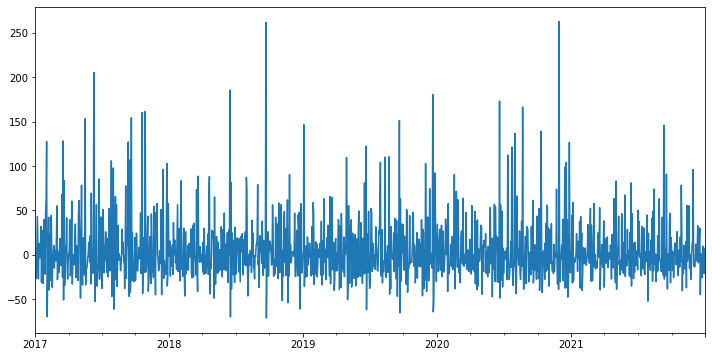

In [38]:
return_apple.plot(figsize=(12,6))

In [39]:
# What was the moving average of various stocks?

moving_avg_apple = data['AAPL'].rolling(7).mean()


In [40]:
moving_avg_apple

2017-01-02             NaN
2017-01-03             NaN
2017-01-04             NaN
2017-01-05             NaN
2017-01-06             NaN
                  ...     
2021-12-27    9.969797e+07
2021-12-28    8.308534e+07
2021-12-29    7.663531e+07
2021-12-30    7.214776e+07
2021-12-31    6.813733e+07
Freq: B, Name: AAPL, Length: 1305, dtype: float64

In [41]:
# What was the daily return average of a stock?

return_apple.mean()

4.996731348536238

In [42]:
#Adda new column ‘Trend’ whose values are based on the 'Daily Return'.

data['apple_trend1'] = 0

In [43]:
data['apple_return1'] = return_apple

In [44]:
data.head()

Symbols,AAPL,MSFT,^GSPC,AMZN,apple_trend1,apple_return1
2017-01-02,NaN,NaN,NaN,NaN,0,NaN
2017-01-03,115127600.0,20694100.0,3.773010e+09,70422000.0,0,NaN
2017-01-04,84472400.0,21340000.0,3.768890e+09,50210000.0,0,-26.627151
2017-01-05,88774400.0,24876000.0,3.785080e+09,116602000.0,0,5.092788
2017-01-06,127007600.0,19922900.0,3.342080e+09,119724000.0,0,43.067821
